In [ ]:
import pandas as pd
import numpy as np
import sklearn


In [ ]:
#Membuka file dataset yang digunakan
df = pd.read_csv('./academic.csv')
df.head()

,ID,Class,Gender (X1),Status IMT (X2),Berkacamata (X3),Pernah Sakit (X4),Gangguan Psikis (X5),Aktif Bertanya (X6),Aktif Menjawab (X7),Mengerjakan Tugas (X8),Tertarik Materi (X9),Alokasi Jam Belajar (X10),Memiliki Referensi Tambahan(X11),Browsing dan Youtube (X12),Mengulang Materi (X13),Praktek Mandiri (X14),Berdiskusi (X15),Memiliki HP(X16),Memiliki Laptop (X17),Kecukupan Kuota Internet (X18),Dukungan Suasana rumah (X19),PLN (X20),Lokasi (X21),Ketersediaan Sinyal (X22)
0,1,0,P,NORMAL,Tidak,Tidak,Tidak,Ya,Ya,Semua,Mungkin,ANTARA 5 - 10 JAM,Ada,Ya,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Tidak,Kadang-kadang,Ya,Pedesaan,Sebagian
1,2,2,L,GEMUK,Ya,Tidak,Tidak,Tidak,Tidak,Semua,Mungkin,ANTARA 5 - 10 JAM,Tidak Ada,Ya,Kadang-kadang,Kadang-kadang,Tidak,Ya,Ya,Ya,Ya,Ya,Perkotaan,Ya
2,3,2,P,NORMAL,Ya,Tidak,Tidak,Tidak,Tidak,Semua,Ya,KURANG DARI 5 JAM,Tidak Ada,Ya,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Ya,Ya,Ya,Perkotaan,Sebagian
3,4,2,P,NORMAL,Tidak,Ya,Tidak,Tidak,Tidak,Semua,Mungkin,KURANG DARI 5 JAM,Tidak Ada,Ya,Kadang-kadang,Ya,Ya,Ya,Ya,Ya,Kadang-kadang,Ya,Perkotaan,Ya
4,5,0,P,NORMAL,Tidak,Ya,Ya,Ya,Ya,Semua,Ya,KURANG DARI 5 JAM,Ada,Ya,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Kadang-kadang,Ya,Ya,Perkotaan,Sebagian


In [ ]:
#Menampilkan data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   ID                                91 non-null     int64 
 1   Class                             91 non-null     int64 
 2   Gender (X1)                       91 non-null     object
 3   Status IMT (X2)                   91 non-null     object
 4   Berkacamata (X3)                  91 non-null     object
 5   Pernah Sakit (X4)                 91 non-null     object
 6   Gangguan Psikis (X5)              91 non-null     object
 7   Aktif Bertanya (X6)               91 non-null     object
 8   Aktif Menjawab (X7)               91 non-null     object
 9   Mengerjakan Tugas (X8)            91 non-null     object
 10  Tertarik Materi (X9)              91 non-null     object
 11  Alokasi Jam Belajar (X10)         91 non-null     object
 12  Memiliki Referensi Tamba

In [ ]:
#Proses filter value data unique
for column in df.columns:
  print(f"Unique Data of Column {column}: ", np.sort(df[column].unique()))

Unique Data of Column ID:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91]
Unique Data of Column Class:  [0 1 2 3]
Unique Data of Column Gender (X1):  ['L' 'P']
Unique Data of Column Status IMT (X2):  ['GEMUK' 'KURUS' 'NORMAL' 'OBESITAS']
Unique Data of Column Berkacamata (X3):  ['Tidak' 'Ya']
Unique Data of Column Pernah Sakit (X4):  ['Tidak' 'Ya']
Unique Data of Column Gangguan Psikis (X5):  ['Tidak' 'Ya']
Unique Data of Column Aktif Bertanya (X6):  ['Tidak' 'Ya']
Unique Data of Column Aktif Menjawab (X7):  ['Tidak' 'Ya']
Unique Data of Column Mengerjakan Tugas (X8):  ['Sebagian' 'Semua']
Unique Data of Column Tertarik Materi (X9):  ['Mungkin' 'Tidak' 'Ya']
Unique Data of Column Alokasi Jam Belajar (X10):  [' LEBIH DARI 10 JAM' 'ANTARA 5 - 10 JAM' 'KURANG DA

In [ ]:
# Tahap Preprocessing 1
# Menghapus kolom ID
df.drop(columns=['ID'], inplace=True)
df.head()

,Class,Gender (X1),Status IMT (X2),Berkacamata (X3),Pernah Sakit (X4),Gangguan Psikis (X5),Aktif Bertanya (X6),Aktif Menjawab (X7),Mengerjakan Tugas (X8),Tertarik Materi (X9),Alokasi Jam Belajar (X10),Memiliki Referensi Tambahan(X11),Browsing dan Youtube (X12),Mengulang Materi (X13),Praktek Mandiri (X14),Berdiskusi (X15),Memiliki HP(X16),Memiliki Laptop (X17),Kecukupan Kuota Internet (X18),Dukungan Suasana rumah (X19),PLN (X20),Lokasi (X21),Ketersediaan Sinyal (X22)
0,0,P,NORMAL,Tidak,Tidak,Tidak,Ya,Ya,Semua,Mungkin,ANTARA 5 - 10 JAM,Ada,Ya,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Tidak,Kadang-kadang,Ya,Pedesaan,Sebagian
1,2,L,GEMUK,Ya,Tidak,Tidak,Tidak,Tidak,Semua,Mungkin,ANTARA 5 - 10 JAM,Tidak Ada,Ya,Kadang-kadang,Kadang-kadang,Tidak,Ya,Ya,Ya,Ya,Ya,Perkotaan,Ya
2,2,P,NORMAL,Ya,Tidak,Tidak,Tidak,Tidak,Semua,Ya,KURANG DARI 5 JAM,Tidak Ada,Ya,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Ya,Ya,Ya,Perkotaan,Sebagian
3,2,P,NORMAL,Tidak,Ya,Tidak,Tidak,Tidak,Semua,Mungkin,KURANG DARI 5 JAM,Tidak Ada,Ya,Kadang-kadang,Ya,Ya,Ya,Ya,Ya,Kadang-kadang,Ya,Perkotaan,Ya
4,0,P,NORMAL,Tidak,Ya,Ya,Ya,Ya,Semua,Ya,KURANG DARI 5 JAM,Ada,Ya,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Kadang-kadang,Ya,Ya,Perkotaan,Sebagian


In [ ]:
# Tahap Preprocessing 2
# Merename nama kolom
df.columns = [column.lower() for column in df.columns]
df.columns

Index(['class', 'gender (x1)', 'status imt (x2)', 'berkacamata (x3)',
       'pernah sakit (x4)', 'gangguan psikis (x5)', 'aktif bertanya (x6)',
       'aktif menjawab (x7)', 'mengerjakan tugas (x8)', 'tertarik materi (x9)',
       'alokasi jam belajar (x10)', 'memiliki referensi tambahan(x11)',
       'browsing dan youtube (x12)', 'mengulang materi (x13)',
       'praktek mandiri (x14)', 'berdiskusi (x15)', 'memiliki hp(x16)',
       'memiliki laptop (x17)', 'kecukupan kuota internet (x18)',
       'dukungan suasana rumah (x19)', 'pln (x20)', 'lokasi (x21)',
       'ketersediaan sinyal  (x22)'],
      dtype='object')

In [ ]:
# Tahap Preprocessing 3
# Validasi NaN
print(df.isna().sum())

class                               0
gender (x1)                         0
status imt (x2)                     0
berkacamata (x3)                    0
pernah sakit (x4)                   0
gangguan psikis (x5)                0
aktif bertanya (x6)                 0
aktif menjawab (x7)                 0
mengerjakan tugas (x8)              0
tertarik materi (x9)                0
alokasi jam belajar (x10)           0
memiliki referensi tambahan(x11)    0
browsing dan youtube (x12)          0
mengulang materi (x13)              0
praktek mandiri (x14)               0
berdiskusi (x15)                    0
memiliki hp(x16)                    0
memiliki laptop (x17)               0
kecukupan kuota internet (x18)      0
dukungan suasana rumah (x19)        0
pln (x20)                           0
lokasi (x21)                        0
ketersediaan sinyal  (x22)          0
dtype: int64


In [ ]:
# Tahap Preprocessing 4
# Menghapus data duplikat
df = df.drop_duplicates()
df.head()

,class,gender (x1),status imt (x2),berkacamata (x3),pernah sakit (x4),gangguan psikis (x5),aktif bertanya (x6),aktif menjawab (x7),mengerjakan tugas (x8),tertarik materi (x9),alokasi jam belajar (x10),memiliki referensi tambahan(x11),browsing dan youtube (x12),mengulang materi (x13),praktek mandiri (x14),berdiskusi (x15),memiliki hp(x16),memiliki laptop (x17),kecukupan kuota internet (x18),dukungan suasana rumah (x19),pln (x20),lokasi (x21),ketersediaan sinyal (x22)
0,0,P,NORMAL,Tidak,Tidak,Tidak,Ya,Ya,Semua,Mungkin,ANTARA 5 - 10 JAM,Ada,Ya,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Tidak,Kadang-kadang,Ya,Pedesaan,Sebagian
1,2,L,GEMUK,Ya,Tidak,Tidak,Tidak,Tidak,Semua,Mungkin,ANTARA 5 - 10 JAM,Tidak Ada,Ya,Kadang-kadang,Kadang-kadang,Tidak,Ya,Ya,Ya,Ya,Ya,Perkotaan,Ya
2,2,P,NORMAL,Ya,Tidak,Tidak,Tidak,Tidak,Semua,Ya,KURANG DARI 5 JAM,Tidak Ada,Ya,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Ya,Ya,Ya,Perkotaan,Sebagian
3,2,P,NORMAL,Tidak,Ya,Tidak,Tidak,Tidak,Semua,Mungkin,KURANG DARI 5 JAM,Tidak Ada,Ya,Kadang-kadang,Ya,Ya,Ya,Ya,Ya,Kadang-kadang,Ya,Perkotaan,Ya
4,0,P,NORMAL,Tidak,Ya,Ya,Ya,Ya,Semua,Ya,KURANG DARI 5 JAM,Ada,Ya,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Kadang-kadang,Ya,Ya,Perkotaan,Sebagian


In [ ]:
# Tahap Preprocessing 5
# Konversi value String menjadi Int
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df.iloc[:, 1:] = encoder.fit_transform(df.iloc[:, 1:])
df.head()

,class,gender (x1),status imt (x2),berkacamata (x3),pernah sakit (x4),gangguan psikis (x5),aktif bertanya (x6),aktif menjawab (x7),mengerjakan tugas (x8),tertarik materi (x9),alokasi jam belajar (x10),memiliki referensi tambahan(x11),browsing dan youtube (x12),mengulang materi (x13),praktek mandiri (x14),berdiskusi (x15),memiliki hp(x16),memiliki laptop (x17),kecukupan kuota internet (x18),dukungan suasana rumah (x19),pln (x20),lokasi (x21),ketersediaan sinyal (x22)
0,0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
1,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0
2,2,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0
3,2,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0
4,0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0


In [ ]:
# Tahap Preprocessing 6
# Memisah data menjadi feature dan class
x = df.iloc[:, 1:]
y = df[['class']]

In [ ]:
# Tahap Preprocessing 7
# Memisah data train dan validasi
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state = 1)

In [ ]:
# Membuat Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate,cross_val_score
model=KNeighborsClassifier(n_neighbors=43, weights='distance')
X=df.drop('class',axis=1)
y=df['class']
cv_score1=cross_validate(model,X,y,cv=5, return_train_score=True)
cv_score2=cross_val_score(model,X,y,cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
# Membuat Model Akurasi
print (cv_score1['train_score'].mean(), cv_score1['test_score'].mean())

1.0 0.7479532163742689


In [ ]:
# test score
print(cv_score2.mean())

0.7488888888888889


In [ ]:
def knn_predict(k) :
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_validate(model,X,y,cv=10, return_train_score=True)
    train_score = score['train_score'].mean()
    test_score = score['test_score'].mean()
    return train_score, test_score

In [ ]:
#Tuning Hyperparameter KNN manual
train_scores=[]
test_scores=[]
for k in range (2,80):
    train_score, test_score=knn_predict(k)
    train_scores.append(train_score)
    test_scores.append(test_score)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class

<function matplotlib.pyplot.show>

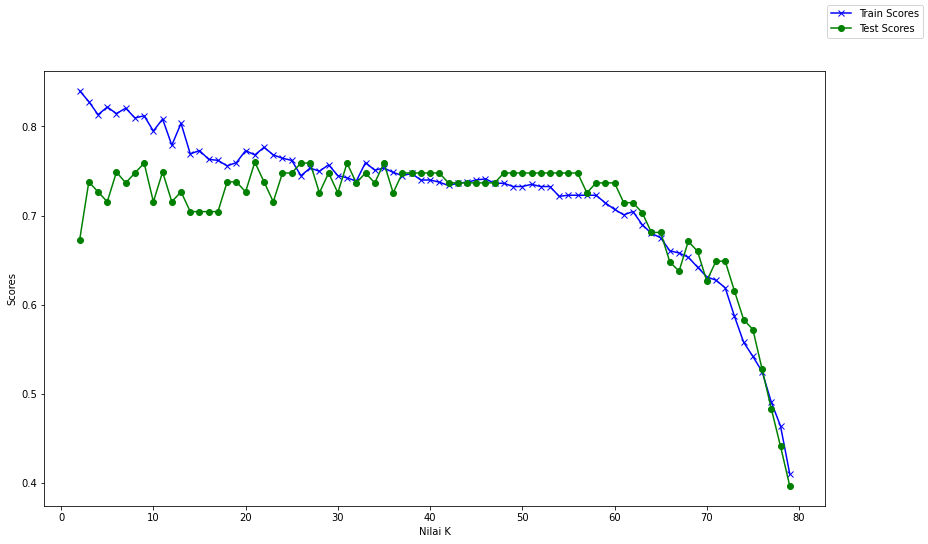

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(14,8))
ax.plot(range(2,80),train_scores, marker='x', color='b', label='Train Scores')
ax.plot(range(2,80),test_scores, marker='o', color='g', label='Test Scores')
ax.set_xlabel('Nilai K')
ax.set_ylabel('Scores')
fig.legend()
plt.show

In [ ]:
#Tuning Hyperparameter KNN otomatis dengan GridSearchCV 
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(5,50),'weights':['distance','uniform']}
gscv=GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5)
gscv.fit(X,y)
print(gscv.best_params_,gscv.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'n_neighbors': 8, 'weights': 'distance'} 0.8146198830409357


In [ ]:
#Tuning Hyperparameter KNN otomatis dengan RandomGridSearchCV , default iter =10
from sklearn.model_selection import RandomizedSearchCV
model = KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(5,50),'weights':['distance','uniform']}
rscv=RandomizedSearchCV(model, param_grid,n_iter=15, scoring='accuracy', cv=5)
rscv.fit(X,y)
print(rscv.best_params_, rscv.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'weights': 'distance', 'n_neighbors': 8} 0.8146198830409357
